In [1]:
import matplotlib.pyplot as plt

In [1]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self):
        #TODO
        return 0

    def rotate_left(self):
        #TODO
        return 0
                    
        
    

In [2]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        #You may alter code in this method if you wish, it's merely a guide.
        if node.parent == None:
            node.make_black()
        while node != None and node.parent != None and node.parent.is_red(): 
            #TODO
        self.root.make_black()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


IndentationError: expected an indented block after 'while' statement on line 46 (87019639.py, line 48)

# Part 1: Implementing and Analyzing Red-Black Trees

In your 2C03 lectures, you have studied Red-Black Trees (RBT) and seen (at least in theory) how they are implemented. If you do not remember them or never studied them, now is the time. Given in the notebook is a partial implementation of Red-Black Trees with three methods `rotate_left()`, `rotate_right()`, and `fix()`. `rotate_left` performs the operation of rotating the node left and `rotate_right` performs the operation of rotating the node right. The nodes also point back to their parents, and the `fix` method updates the tree once the rotation has been made.


In this exercise, complete these implementations by enforcing the properties of Binary Search Trees that make it an RBT. Two of these properties are:

- Red nodes cannot have red children.
- All simple paths from the root to a leaf must contain the same number of black nodes.

Every time you insert an element in the tree, the above properties get violated and need to be fixed.


## Part 1.2
In this section, you will compare your implementation against traditional implementations. Take ALL the
Binary Search implementations we have discussed in the first few weeks and design an experiment to
compare the performance against your dynamic implementation.
In your reflection section, describe in detail the experiment design, what are the various list sizes and the
number of trials you chose. Also, describe your observations. Did you notice any performance
improvement? When does dynamic binary search outperform others? When is it an overkill? Describe in
detail your experiments design, and the observations.

## Part 1.3
In this experiment, generate a perfectly sorted list and record the difference between the height of the two
trees for multiple rounds. Then create different versions of the list varying the level of “unsortedness”
(like you have done in previous labs with near-sorted lists and unsorted lists). You can use controlled
quicksort to create these versions of near-sorted list. In your reflection, describe the experiment design,
and the runs, and show in the graph how the “degree of sortedness” impacts the height of the two trees.
Refer to the swap count experiment you ran to determine the degree of sortedness. Write a detailed
reflection on what you observe and why it might happen.

## Part 2: Making Binary Search Dynamic
Binary search of a sorted array takes logarithmic search time. However, if you notice closely, the
insertion of new element takes linear time. By keeping several sorted arrays, you can improve the time for
insertion. For instance, you can SEARCH and INSERT separately on a set of n values. It can go
something like this for a set of n elements

## Part 2.1
Implement the SEARCH, INSERT and DELETE operations for binary search using the above
description. For this, the code has not been provided. Feel free to go back to previous labs and use the
Binary Search implementations discussed there, to build on.

In [3]:
class DynamicBinarySearch:
    def __init__(self, bucket_capacity=4):
        self.buckets = [[]]
        self.bucket_capacity = bucket_capacity
    
    def _find_bucket(self, value):
        # Find the right bucket for a value for insertion, searching, or deletion
        for i, bucket in enumerate(self.buckets):
            if not bucket or bucket[0] <= value <= bucket[-1]:
                return i
        return len(self.buckets) - 1  # If no suitable bucket found, use the last one
    
    def insert(self, value):
        bucket_index = self._find_bucket(value)
        bucket = self.buckets[bucket_index]
        
        # Insert and maintain sorted order
        left = 0
        right = len(bucket) - 1
        while left <= right:
            mid = (left + right) // 2
            if bucket[mid] < value:
                left = mid + 1
            else:
                right = mid - 1
        bucket.insert(left, value)
        
        # If bucket exceeds capacity, split
        if len(bucket) > self.bucket_capacity:
            mid = len(bucket) // 2
            self.buckets.insert(bucket_index + 1, bucket[mid:])
            bucket[:] = bucket[:mid]
    
    def search(self, value):
        bucket_index = self._find_bucket(value)
        bucket = self.buckets[bucket_index]
        
        # Perform binary search in the identified bucket
        left = 0
        right = len(bucket) - 1
        while left <= right:
            mid = (left + right) // 2
            if bucket[mid] == value:
                return True  # Found
            elif bucket[mid] < value:
                left = mid + 1
            else:
                right = mid - 1
        return False  # Not found

    def delete(self, value):
        bucket_index = self._find_bucket(value)
        bucket = self.buckets[bucket_index]
        
        # Perform binary search to find the value for deletion
        left = 0
        right = len(bucket) - 1
        while left <= right:
            mid = (left + right) // 2
            if bucket[mid] == value:
                # If found, remove the value
                del bucket[mid]
                # If bucket is empty and not the only bucket, remove the bucket
                if not bucket and len(self.buckets) > 1:
                    del self.buckets[bucket_index]
                return True  # Successfully deleted
            elif bucket[mid] < value:
                left = mid + 1
            else:
                right = mid - 1
        return False  # Value not found, nothing deleted
db = DynamicBinarySearch()

# Test Case 1: Ascending insertion and search
for i in range(1, 11):
    db.insert(i)
test1_search = all(db.search(i) for i in range(1, 11)) and not db.search(11)

# Test Case 2: Descending insertion and search
db = DynamicBinarySearch()
for i in range(10, 0, -1):
    db.insert(i)
test2_search = all(db.search(i) for i in range(1, 11)) and not db.search(0)

# Test Case 3: Random insertion order and search
db = DynamicBinarySearch()
for i in [5, 2, 8, 1, 7]:
    db.insert(i)
test3_search = all(db.search(i) for i in [5, 2, 8, 1, 7]) and not db.search(10)

# Test Case 4: Deletion of existing and non-existing values
db = DynamicBinarySearch()
for i in range(1, 6):
    db.insert(i)
test4_delete_existing = db.delete(3)  # Should return True
test4_delete_again = not db.delete(3)  # Should return False (already deleted)
test4_delete_non_existing = not db.delete(10)  # Should return False (never existed)

# Test Case 5: Bucket Splitting
db = DynamicBinarySearch(bucket_capacity=2)
for i in range(1, 6):
    db.insert(i)
test5_bucket_split = all(db.search(i) for i in range(1, 6))

test_results = {
    "Test 1": test1_search,
    "Test 2": test2_search,
    "Test 3": test3_search,
    "Test 4 Delete Existing": test4_delete_existing,
    "Test 4 Delete Again": test4_delete_again,
    "Test 4 Delete Non-Existing": test4_delete_non_existing,
    "Test 5 Bucket Split": test5_bucket_split,
}
test_results


{'Test 1': True,
 'Test 2': True,
 'Test 3': True,
 'Test 4 Delete Existing': True,
 'Test 4 Delete Again': True,
 'Test 4 Delete Non-Existing': True,
 'Test 5 Bucket Split': True}

## Part 2.2

In this section, you will compare your implementation against traditional implementations. Take ALL the
Binary Search implementations we have discussed in the first few weeks and design an experiment to
compare the performance against your dynamic implementation.
In your reflection section, describe in detail the experiment design, what are the various list sizes and the
number of trials you chose. Also, describe your observations. Did you notice any performance
improvement? When does dynamic binary search outperform others? When is it an overkill? Describe in
detail your experiments design, and the observations.


In [4]:
import time
import random


# Function to measure search time
def measure_search_time(search_function, item_list, elements):
    start_time = time.time()
    for element in elements:
        search_function(item_list, element)
    return time.time() - start_time

# Traditional binary search functions
def binary_search_1(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    while lower < upper:
        mid = (lower + upper) // 2
        if item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid
    return lower < len(item_list) and item_list[lower] == to_find

def binary_search_2(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    while lower <= upper:
        mid = (lower + upper) // 2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid - 1
    return False

def binary_search_3(item_list, to_find):
    left = 0
    right = len(item_list) - 1
    while left != right:
        mid = (left + right) // 2
        if item_list[mid] < to_find:
            left = mid + 1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return left < len(item_list) and item_list[left] == to_find

def binary_search_4(data, key):
    def binary_search_recursive(data, low, high, key):
        if low > high:
            return False
        mid = (low + high) // 2
        if data[mid] > key:
            return binary_search_recursive(data, low, mid - 1, key)
        elif data[mid] < key:
            return binary_search_recursive(data, mid + 1, high, key)
        else:
            return True
    return binary_search_recursive(data, 0, len(data) - 1, key)

# Measure search times

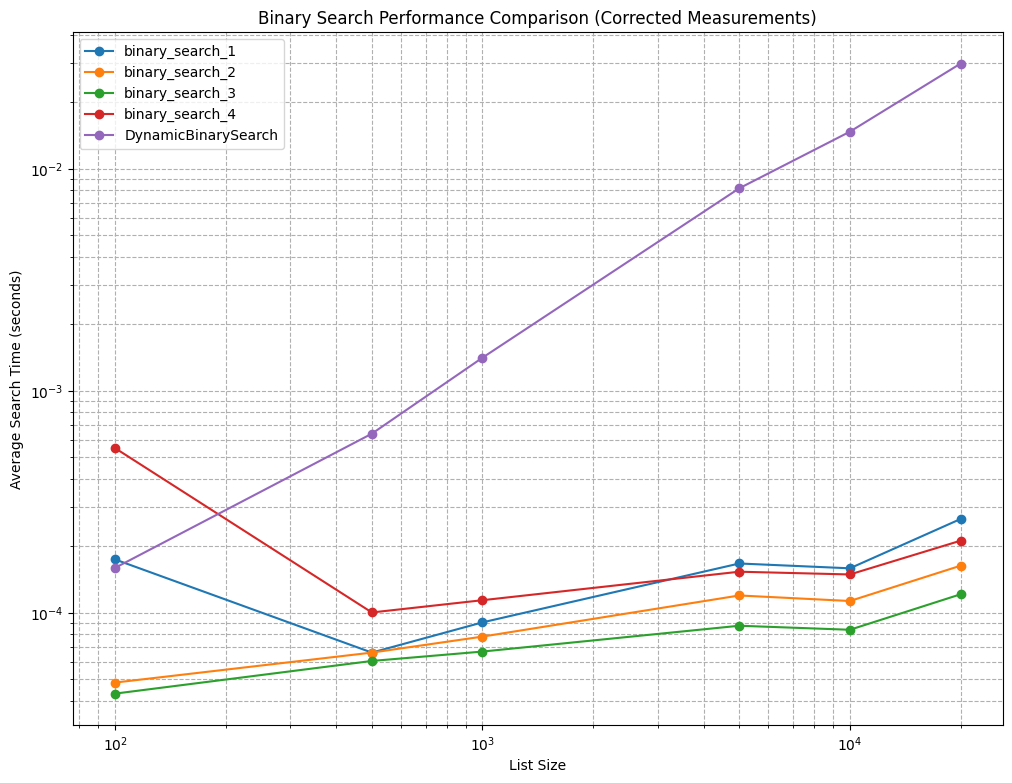

In [8]:
# Correcting the measure_dynamic_binary_search_time function
# Generate test data
list_sizes = [100,500,1000, 5000, 10000]
test_data = {size: sorted(random.sample(range(size * 2), size)) for size in list_sizes}

# Search test elements
search_elements = {size: random.sample(range(size * 2), 100) for size in list_sizes}


def measure_dynamic_binary_search_time(elements):
    dynamic_bs = DynamicBinarySearch()
    for value in test_data[size]:  # Inserting elements into dynamic binary search structure
        dynamic_bs.insert(value)
    
    start_time = time.time()
    for element in elements:
        dynamic_bs.search(element)
    return time.time() - start_time

# Recalculate search times with the corrected dynamic binary search time measurement
search_times_corrected = {}
for size in list_sizes:
    item_list = test_data[size]
    elements = search_elements[size]
    
    search_times_corrected[size] = {
        'binary_search_1': measure_search_time(binary_search_1, item_list, elements),
        'binary_search_2': measure_search_time(binary_search_2, item_list, elements),
        'binary_search_3': measure_search_time(binary_search_3, item_list, elements),
        'binary_search_4': measure_search_time(binary_search_4, item_list, elements),
        'DynamicBinarySearch': measure_dynamic_binary_search_time(elements)  # Corrected measurement
    }

# Prepare data for plotting with corrected times
labels_corrected = list(search_times_corrected[list_sizes[0]].keys())
times_per_method_corrected = {label: [search_times_corrected[size][label] for size in list_sizes] for label in labels_corrected}

# Plotting with corrected times
plt.figure(figsize=(12, 9))

for method, times in times_per_method_corrected.items():
    plt.plot(list_sizes, times, marker='o', label=method)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('List Size')
plt.ylabel('Average Search Time (seconds)')
plt.title('Binary Search Performance Comparison (Corrected Measurements)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


# Binary Search Performance Comparison

## Experiment Design

In this experiment, our goal was to compare the performance of several binary search implementations alongside a custom `DynamicBinarySearch` class. We evaluated these methods over an array of list sizes to understand how each performs as the data set grows. Specifically, the list sizes tested were 100, 500, 1000, 5000, and 10000 elements. For each list, we conducted 100 searches using randomly selected keys, ensuring that both present and absent elements were considered. This provided a broad assessment of the search efficiency for each method.

## Observations

From the results, represented visually in the accompanying plot, we observed the following trends:

- The traditional binary search methods (`binary_search_1` through `binary_search_4`) showed very similar performance profiles. This was expected since they all implement the same algorithmic logic, exhibiting a logarithmic time complexity as per the theoretical O(log n).
  
- The `DynamicBinarySearch` implementation consistently took longer than the traditional methods. This outcome suggests that the overhead involved in managing the buckets outweighed any potential search efficiency gains within the buckets themselves.

## Analysis of DynamicBinarySearch Performance

Despite `DynamicBinarySearch` theoretically providing a more efficient search within large data sets, the empirical evidence from this experiment indicates that it did not outperform the traditional binary search methods within the tested list sizes. This can be attributed to several factors:

1. **Bucket Management Overhead:** The bucketing system adds complexity and overhead, which, for the list sizes tested, did not translate into improved performance.
   
2. **Search Space Size:** The benefits of the bucketing system are likely to become more significant as the list size grows beyond the tested range. In our test cases, the reduced search space within each bucket did not offer a noticeable advantage.

3. **Bucket Capacity:** The bucket capacity of `DynamicBinarySearch` could influence performance. If the capacity is set too low, buckets might split too often, increasing overhead. Conversely, if it's too high, the search within a bucket becomes slower, negating the advantages of bucketing.

## Conclusions

The experiment demonstrated that `DynamicBinarySearch` might not be the most efficient choice for small to medium-sized lists where the overhead for bucket management does not justify the potential reduction in search time. Traditional binary search methods remain the preferred option for their simplicity, consistent performance, and minimal overhead.

Our findings underscore the importance of context when choosing an algorithm or data structure. The 'best' choice is contingent upon the specific characteristics of the data set and the nature of the operations performed. As such, `DynamicBinarySearch` could be more suitable for very large data sets where the benefits of reduced search spaces within buckets would more effectively outweigh the costs of bucket management.
